# Machine Learning No Supervisado

## Importando Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
cars = pd.read_csv('mtcars.csv')

In [3]:
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


*Excluyendo valores Nans*

In [4]:
for c in cars.columns:
    print(c)
    print(np.sum(pd.isnull(cars[c])))

mpg
0
cylinders
0
displacement
0
horsepower
6
weight
0
acceleration
0
model_year
0
origin
0
name
0


In [5]:
cars.loc[ pd.isnull (cars['horsepower']), 'horsepower'] = np.mean(cars['horsepower'])

In [6]:
cars.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

*Obteniendo solamente las columnas numéricas*

In [7]:
carsNum = cars.loc[:, ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year']]

In [8]:
carsNum

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


*Obteniendo un scatter plot*

In [9]:
x = carsNum['acceleration']
y = carsNum['horsepower']

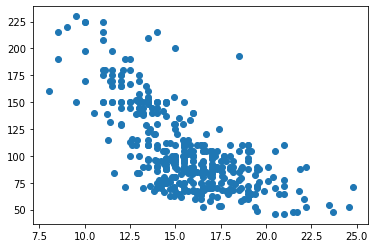

In [10]:
plt.scatter(x, y)

*Obtenemos una matríz de correlaciones*

In [11]:
carsNum.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000


In [12]:
x = carsNum['horsepower']
y = carsNum['displacement']

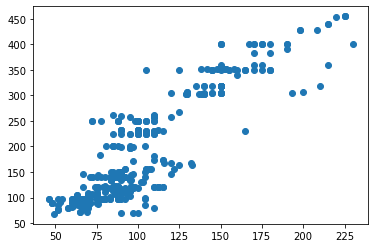

In [13]:
plt.scatter(x, y)

*Obtenemos gráfica de correlaciones*

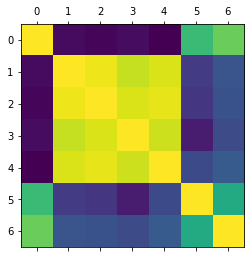

In [14]:
plt.matshow(carsNum.corr())

In [15]:
x = carsNum['acceleration']
y = carsNum['model_year']

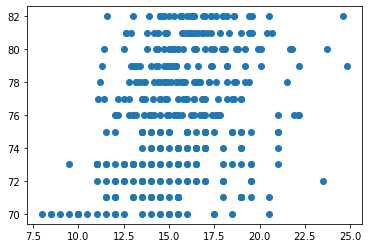

In [16]:
plt.scatter(x, y)

*Construimos gráfico de correlaciones*

<AxesSubplot:>

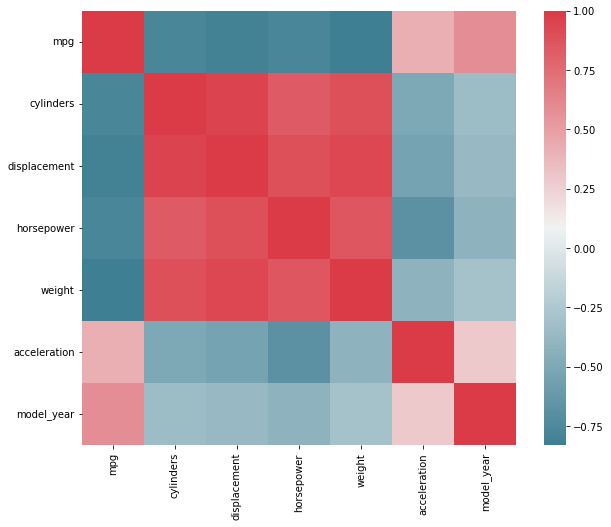

In [17]:
f, ax = plt.subplots(figsize=(10,8))

sns.heatmap(carsNum.corr(), mask = np.zeros_like(carsNum.corr(), dtype = bool), cmap=sns.diverging_palette(220, 10, as_cmap = True), square = True, ax = ax)

# PCA | Principal Component Analysis

In [18]:
cars.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [19]:
columns = [
    'mpg', 
    'cylinders', 
    'displacement', 
    'horsepower', 
    'weight', 
    'acceleration'
]

In [20]:
x = cars.loc[:, columns].values

*Tabla de valores estandarizados*

In [21]:
x = StandardScaler().fit_transform(x)

In [22]:
x = np.around(x, 2)

In [23]:
x

array([[-0.71,  1.5 ,  1.09,  0.67,  0.63, -1.3 ],
       [-1.09,  1.5 ,  1.5 ,  1.59,  0.85, -1.48],
       [-0.71,  1.5 ,  1.2 ,  1.19,  0.55, -1.66],
       ...,
       [ 1.09, -0.86, -0.56, -0.54, -0.8 , -1.44],
       [ 0.57, -0.86, -0.71, -0.67, -0.41,  1.1 ],
       [ 0.96, -0.86, -0.71, -0.59, -0.3 ,  1.39]])

In [24]:
pca = PCA( n_components = 2 )

In [25]:
pricipalComponents = pca.fit_transform(x)

In [27]:
pcadf = pd.DataFrame(data = pricipalComponents, columns=['c1', 'c2'])

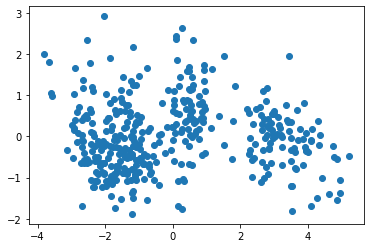

In [28]:
plt.scatter(pcadf['c1'], pcadf['c2'])

In [31]:
kmeans = KMeans(n_clusters = 3).fit(pcadf)

In [32]:
kmeans.cluster_centers_

array([[-1.76973724, -0.19827566],
       [ 3.31873823, -0.14034524],
       [ 0.42581797,  0.56520831]])

In [33]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0,
       0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 2, 0, 2,